# Model for formulary status prediction

This problems is classification problem. We will test the following models.
- Logistic Regression
- k-Nearest Neighbor classifier
- Support Vector Machine
- Random Forest classifier
- XGBoost classifier

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pharmacy_sample_clean.csv")

In [4]:
df_train, df_test = train_test_split(df.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)

In [5]:
features = ['month', 'diagnosis_broad', 'diagnosis_specific', 'drug_type', 'drug_name', 'bin', 'pcngroup']

# One-hot encoding

In [6]:
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [7]:
onehot_pipeline = Pipeline([
        ("onehot", sklearn.preprocessing.OneHotEncoder(handle_unknown = "ignore"))
    ])

preprocessing_pipeline = ColumnTransformer([
        ("preprocessor_column", onehot_pipeline, features)
    ])

# Logistic Regression

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logit_pipe = Pipeline([
    ("pre", preprocessing_pipeline),
    ("logit", LogisticRegression())
])


In [20]:
logit_params = [1, 5, 10, 15, 20, 25]

logit_param_grid = [
    {"logit__penalty": ["l1", "l2"],
    "logit__C": logit_params}
]

In [27]:
logit_gridcv = GridSearchCV(
        estimator = logit_pipe,
        param_grid = logit_param_grid,
        scoring = "accuracy",
    n_jobs = 4
    )

In [28]:

logit_gridcv.fit(
    X = df_train[features],
    y = df_train.rejected
)

C:\Users\riene\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\riene\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\riene\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\riene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, 

GridSearchCV(estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('preprocessor_column',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'diagnosis_broad',
                                                                          'diagnosis_specific',
                                                                          'drug_type',
                                                                          'drug_name',
                                                                          'bin',
                                                                          'pcngroup'])])),
      

# KNN classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn_pipe = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("knn", KNeighborsClassifier())
])

In [40]:
neighbors = list(range(1, 40))

knn_param_grid = [
    {"knn__n_neighbors": neighbors,
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan"]}
]

In [41]:
knn_gridcv = GridSearchCV(
        estimator = knn_pipe,
        param_grid = knn_param_grid,
        scoring = "accuracy",
        cv = 5,
        n_jobs = 4
    )

In [42]:
knn_gridcv.fit(
    X = df_train[features],
    y = df_train.rejected
)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('preprocessor_column',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'diagnosis_broad',
                                                                          'diagnosis_specific',
                                                                          'drug_type',
                                                                          'drug_name',
                                                                          'bin',
                                                                     

# Support Vector Machine

In [46]:
from sklearn.svm import SVC

In [47]:
svm_pipe = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("svc", SVC())
])


In [51]:
svm_params = [1, 5, 10, 15, 20, 25]

svm_param_grid = [
    {"svc__kernel": ["linear", "rbf"],
    "svc__C": svm_params}
]

In [52]:
svm_gridcv = GridSearchCV(
        estimator = svm_pipe,
        param_grid = svm_param_grid,
        scoring = "accuracy",
        cv = 5,
        n_jobs = 4
    )

In [53]:
svm_gridcv.fit(
    X = df_train[features],
    y = df_train.rejected
)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('preprocessor_column',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'diagnosis_broad',
                                                                          'diagnosis_specific',
                                                                          'drug_type',
                                                                          'drug_name',
                                                                          'bin',
                                                                     

# Random forest classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_pipe = Pipeline([
    ("pre", preprocessing_pipeline),
    ("rf", RandomForestClassifier(n_estimators = 1000))
])

In [56]:
param_range = [1, 5, 10, 15, 20, 25]

rf_param_grid = {
    "rf__min_samples_leaf": param_range,
}

In [60]:
rf_gridcv = GridSearchCV(
        estimator = rf_pipe,
        param_grid = rf_param_grid,
        scoring = "accuracy",
        cv = 5,
        n_jobs = 4
    )

In [61]:
rf_gridcv.fit(
    X = df_train[features],
    y = df_train.rejected
)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('preprocessor_column',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'diagnosis_broad',
                                                                          'diagnosis_specific',
                                                                          'drug_type',
                                                                          'drug_name',
                                                                          'bin',
                                                                          'pcn

In [70]:
rf_gridcv.best_score_

0.9258750000000001

In [71]:
rf_gridcv.predict(df_test[features])

array([False, False, False, ..., False, False, False])

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(rf_gridcv.predict(df_test[features]), df_test.rejected)

0.9225

# XGBoost classifier

In [62]:
import xgboost

In [63]:
xgb_pipe = Pipeline([
    ("pre", preprocessing_pipeline),
    ("xgb", xgboost.XGBClassifier())
])

In [75]:
param_range = [1, 5, 10, 15, 20, 25]
param_range_fl = [0.1, 0,5, 1]
n_estimators = [100, 500, 1000]
learning_rates = [0.1, 0.5, 1]

xgb_param_grid = [
    {"xgb__learning_rate": learning_rates,
    "xgb__max_depth": param_range,
    "xgb__subsample": param_range_fl,
    "xgb__n_estimators": n_estimators}
]

In [76]:
xgb_gridcv = GridSearchCV(
        estimator = xgb_pipe,
        param_grid = xgb_param_grid,
        scoring = "accuracy",
        cv = 5,
        n_jobs = 4
    )

In [77]:
xgb_gridcv.fit(
    X = df_train[features],
    y = df_train.rejected
)

C:\Users\riene\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\riene\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\riene\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\riene\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\riene\anaconda3\lib\si

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('preprocessor_column',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'diagnosis_broad',
                                                                          'diagnosis_specific',
                                                                          'drug_type',
                                                                          'drug_name',
                                                                          'bin',
                                                                          'pcn

# Scores

In [79]:
models  = [logit_gridcv, knn_gridcv, svm_gridcv, rf_gridcv, xgb_gridcv]
scores = []
for model in models:
    scores.append(accuracy_score(model.predict(df_test[features]), df_test.rejected))

In [82]:
df_scores = pd.DataFrame(
scores,
columns = ['accuracy'],
index = ["Logistic", "KNN", "SVM", "RandomForest", "XGBoost"])

In [83]:
df_scores

,accuracy
Logistic,0.9230
KNN,0.9220
SVM,0.9225
RandomForest,0.9225
XGBoost,0.9225


<AxesSubplot:ylabel='accuracy'>

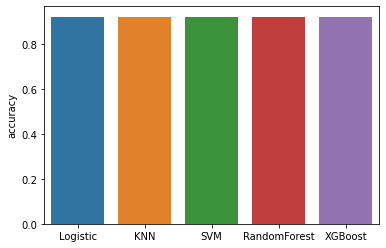

In [84]:
sns.barplot(
data = df_scores,
y = 'accuracy',
x = df_scores.index)

We observe that there are no significant differences between models.